In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('DS1_C5_S1_BankChurn_Data_Concept.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

In [ ]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [ ]:
def separator(data, margin):
  cat=[]
  num=[]
  for col in data.columns:
    if data[col].nunique()<margin:
      cat.append(col)
    else:
      num.append(col)
  return cat, num

In [ ]:
categorical, numerical = separator(df, 60)

In [ ]:
df.Dependent_count.nunique()

56

In [ ]:
categorical

['Attrition_Flag',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [ ]:
numerical

['CLIENTNUM',
 'Customer_Age',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

In [ ]:
attrition_flag=df['Attrition_Flag'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(1,2, figsize=(12,8))    # 1 row and 2 columns
ax[0].set_title('Count of attrition wise data')
sns.countplot (x=df['Attrition_Flag'], ax =ax[0])
plt.pie(attrition_flag, labels=attrition_flag.index, autopct='%0.2f%%')
plt.suptitle('Attrition Flag distribution Level1')
plt.show()

There are 16.07% of customers who ended up attriting while 83.93% did not undergo attrition

**Level 1 for Gender category**

In [ ]:
gender_flag=df['Gender'].value_counts()

In [ ]:
df.Gender.isnull().sum()

93

In [ ]:
df.Gender.mode()[0]

'F'

In [ ]:
df.Gender.fillna(df.Gender.mode()[0], inplace=True)

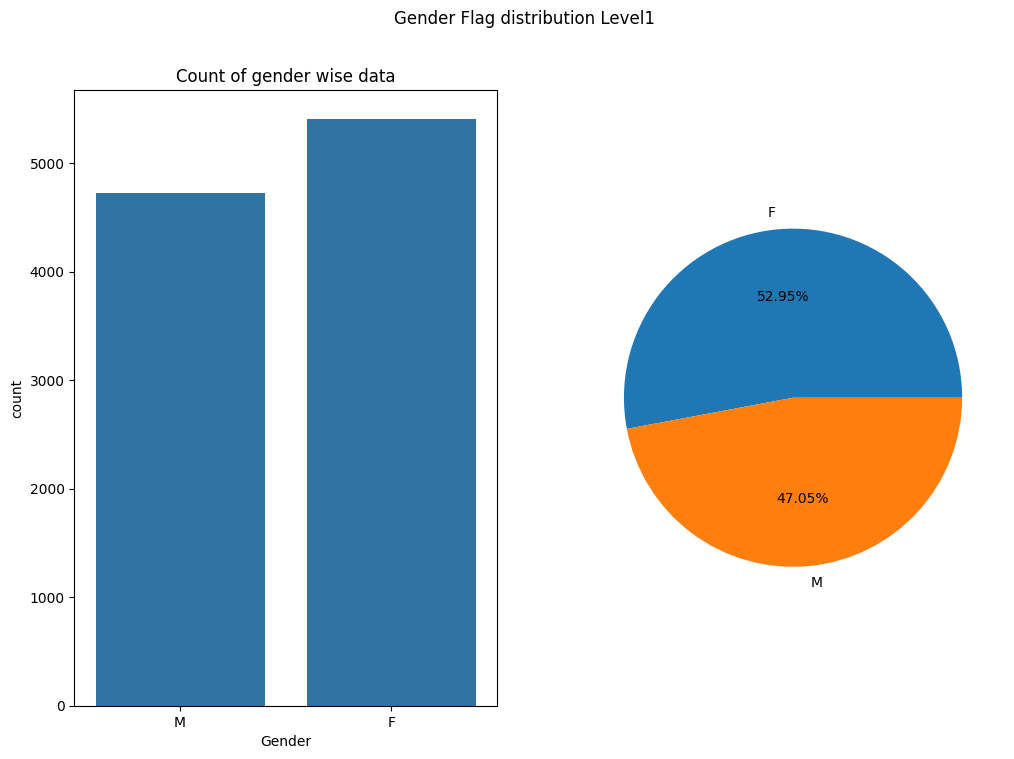

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(12,8))    # 1 row and 2 columns
ax[0].set_title('Count of gender wise data')
sns.countplot (x=df['Gender'], ax =ax[0])
plt.pie(gender_flag, labels=gender_flag.index, autopct='%0.2f%%')
plt.suptitle('Gender Flag distribution Level1')
plt.show()

47.05% customers are males while 52.95% are females

**Dependent Count**

In [ ]:
q1 = df['Dependent_count'].quantile(0.25)
q3 = df['Dependent_count'].quantile(0.75)
iqr = q3-q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

In [ ]:
dep_count_med = df['Dependent_count'].median()

In [ ]:
condition=(df['Dependent_count']<lf)|(df['Dependent_count']>uf)
df.loc[condition,'Dependent_count']=dep_count_med

In [ ]:
dependent_flag=df['Dependent_count'].value_counts()

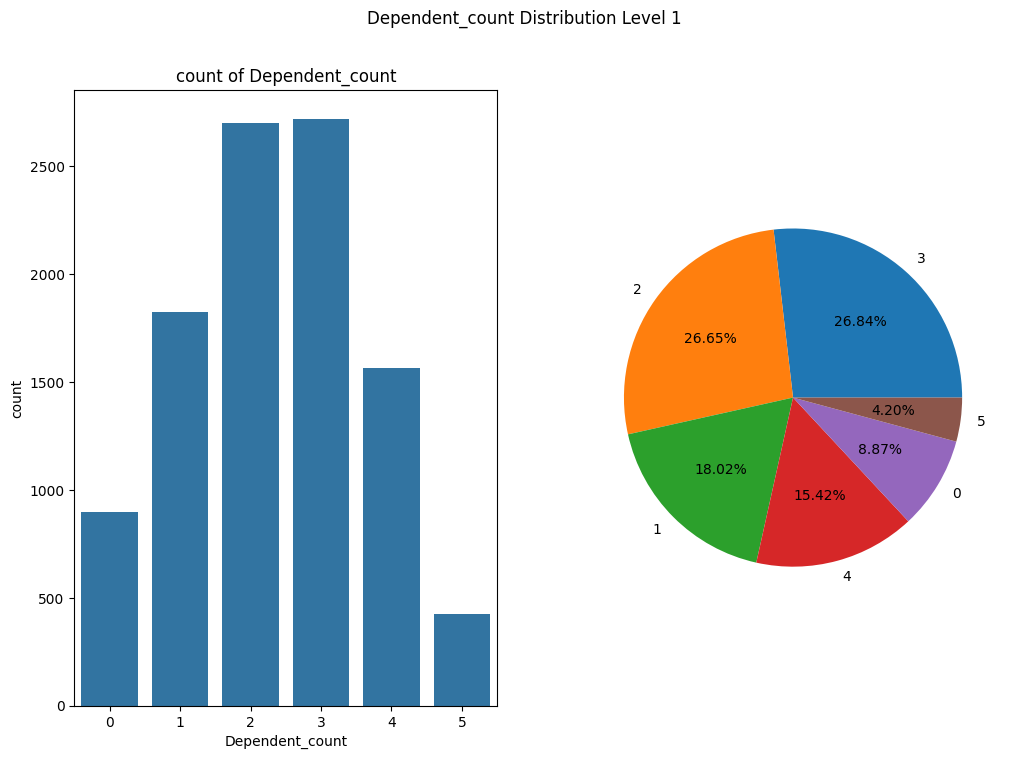

In [ ]:
fig,ax= plt.subplots(1,2,figsize=(12,8))
ax[0].set_title('count of Dependent_count')
sns.countplot(x=df['Dependent_count'],ax= ax[0])
plt.pie(dependent_flag,labels= dependent_flag.index,autopct='%0.2f%%')
plt.suptitle('Dependent_count Distribution Level 1')    # super title
plt.show()

In [ ]:
education_flag=df['Education_Level'].value_counts()

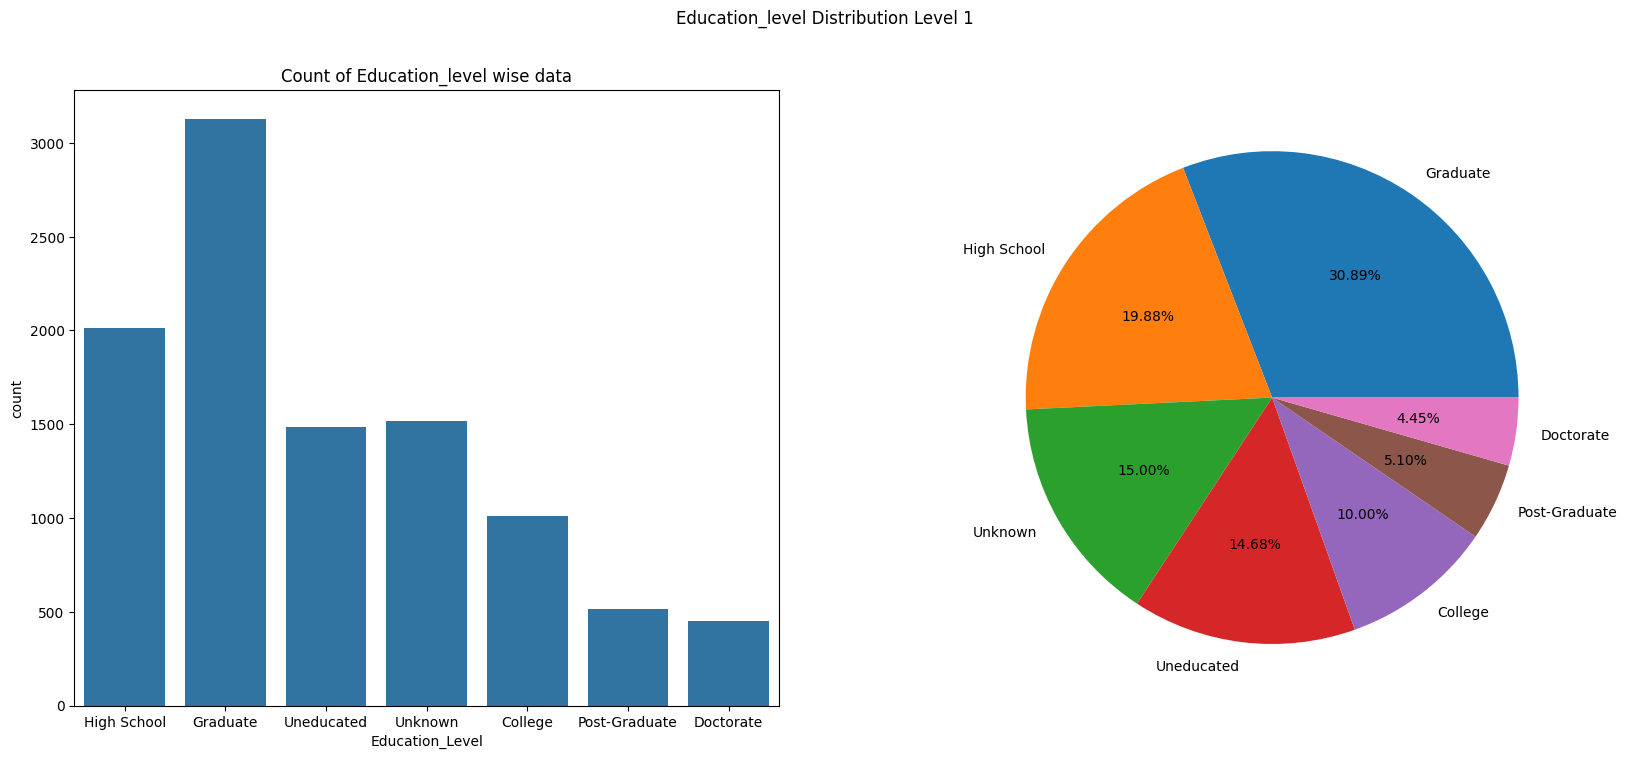

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].set_title('Count of Education_level wise data')
sns.countplot(x=df['Education_Level'],ax=ax[0])
plt.pie(education_flag,labels=education_flag.index,autopct='%0.2f%%')
plt.suptitle('Education_level Distribution Level 1')
plt.show()

**Marital status**

In [ ]:
marital_status_flag=df['Marital_Status'].value_counts()

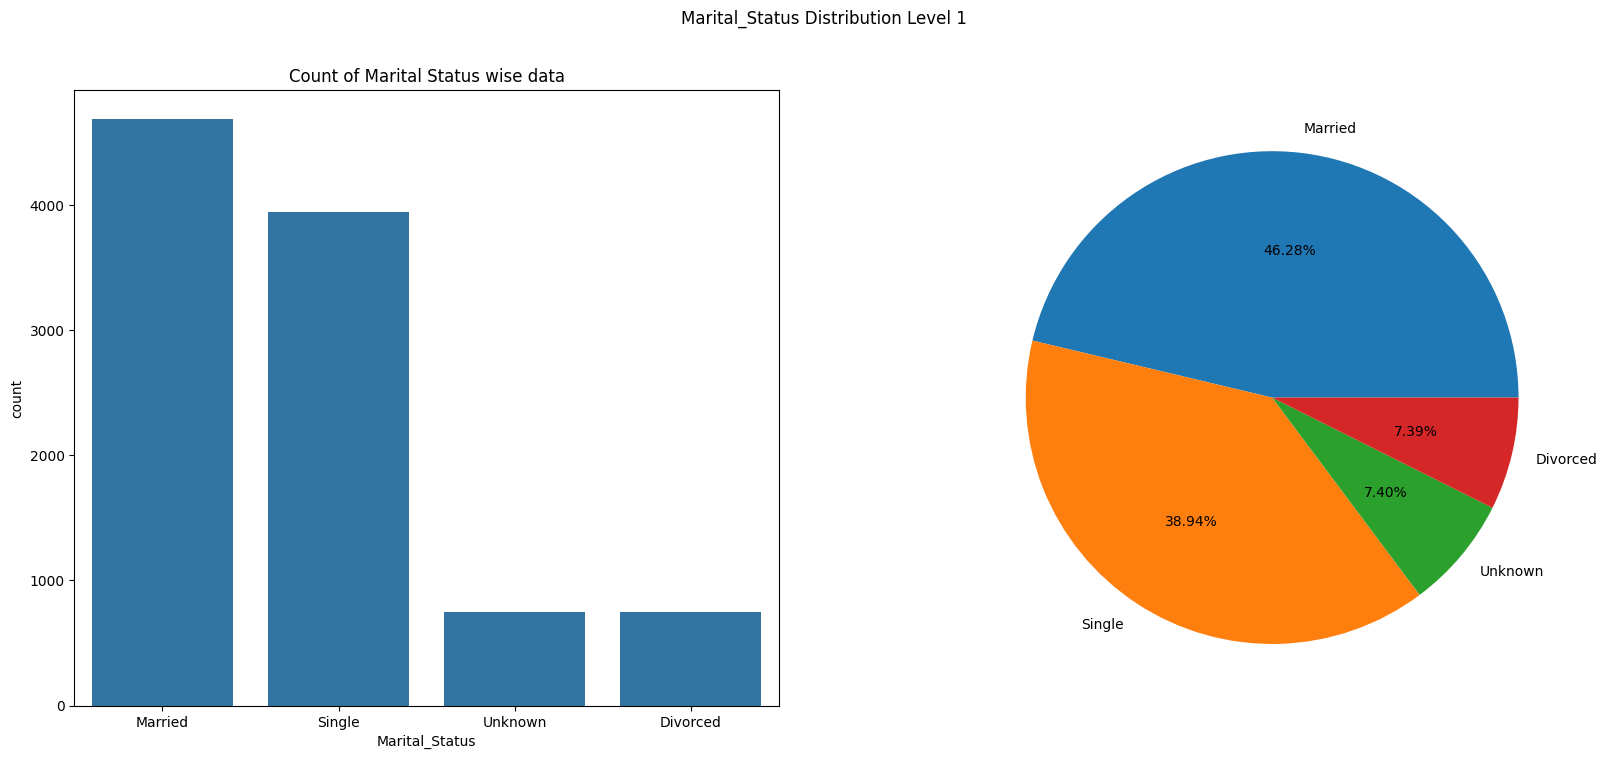

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].set_title('Count of Marital Status wise data')
sns.countplot(x=df['Marital_Status'],ax=ax[0])
plt.pie(marital_status_flag,labels=marital_status_flag.index,autopct='%0.2f%%')
plt.suptitle('Marital_Status Distribution Level 1')
plt.show()

In [ ]:
income_category_flag=df['Income_Category'].value_counts()

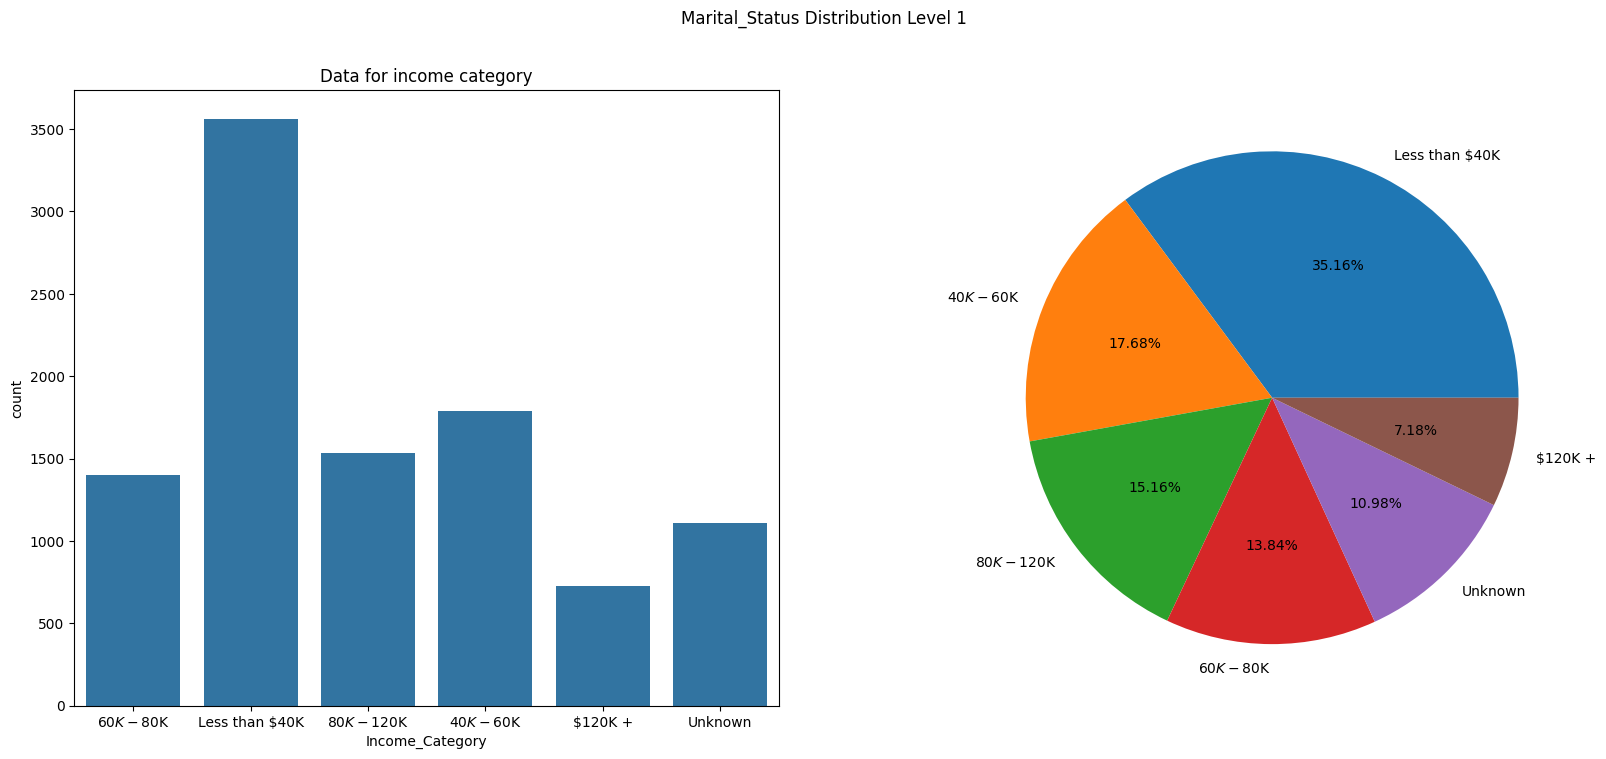

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].set_title('Data for income category')
sns.countplot(x=df['Income_Category'],ax=ax[0])
plt.pie(income_category_flag,labels=income_category_flag.index,autopct='%0.2f%%')
plt.suptitle('Marital_Status Distribution Level 1')
plt.show()

In [ ]:
dep_count_med = df['Card_Category'].mode()

In [ ]:
df['Card_Category'].fillna(df.Card_Category.mode()[0], inplace=True)

In [ ]:
df['Card_Category'].isnull().sum()

0

In [ ]:
card_category_flag=df['Card_Category'].value_counts()

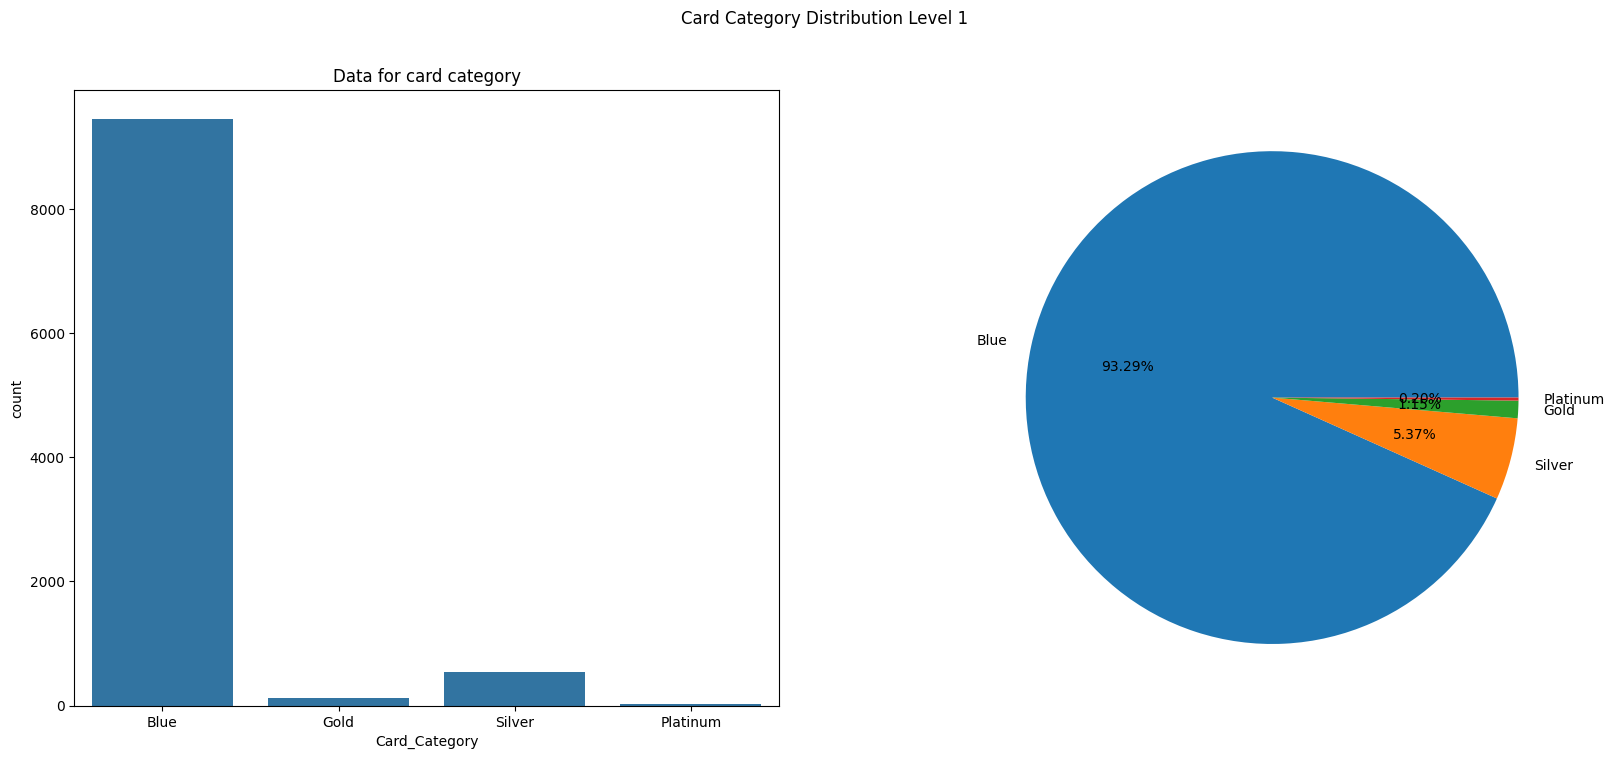

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].set_title('Data for card category')
sns.countplot(x=df['Card_Category'],ax=ax[0])
plt.pie(card_category_flag,labels=card_category_flag.index,autopct='%0.2f%%')
plt.suptitle('Card Category Distribution Level 1')
plt.show()

In [ ]:
months_on_book_flag=df['Months_on_book'].value_counts()
months_on_book_flag

Months_on_book
36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: count, dtype: int64

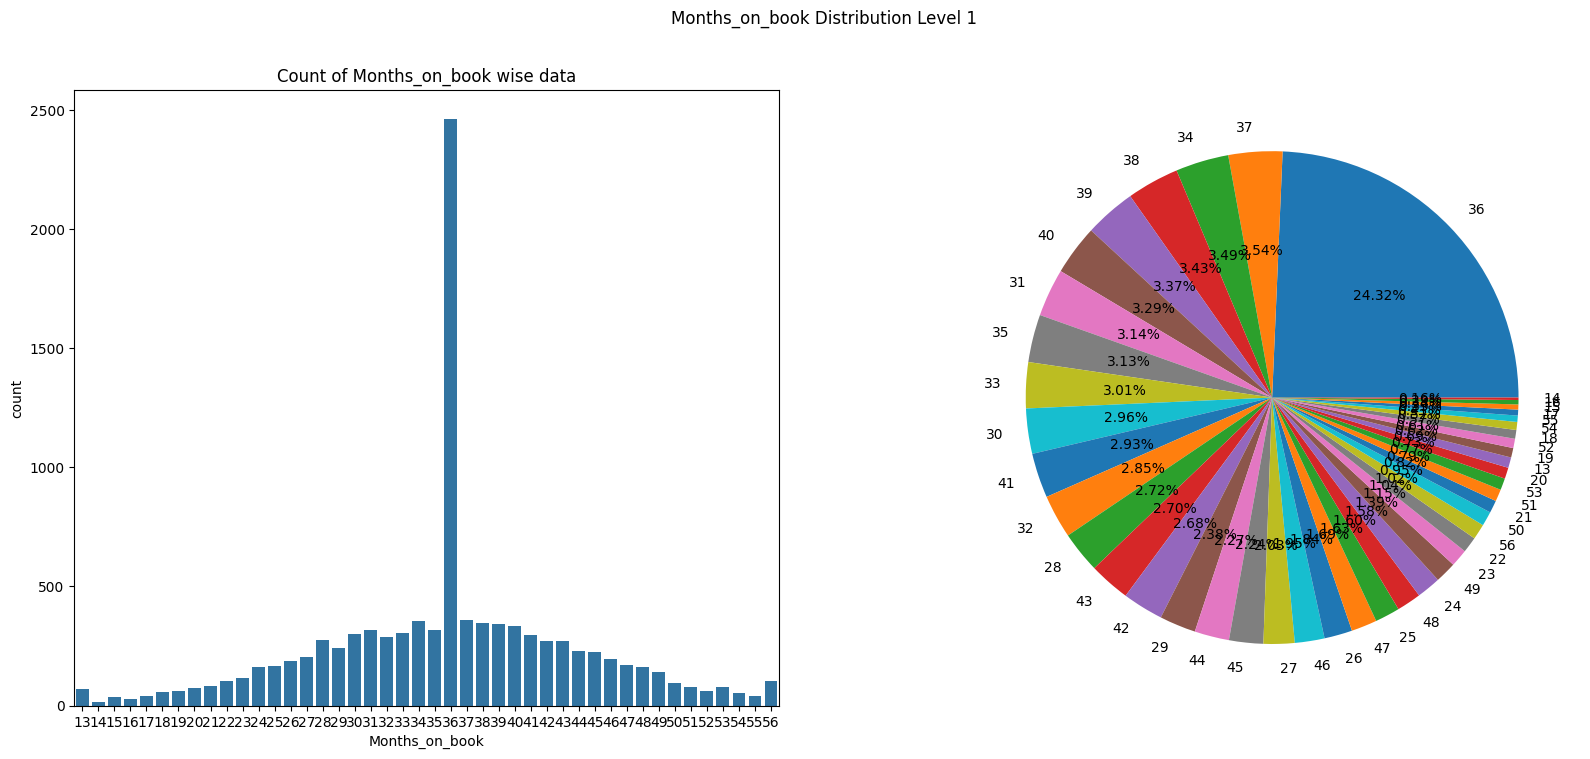

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].set_title('Count of Months_on_book wise data')
sns.countplot(x=df['Months_on_book'],ax=ax[0])
plt.pie(months_on_book_flag,labels=months_on_book_flag.index,autopct='%0.2f%%')
plt.suptitle('Months_on_book Distribution Level 1')
plt.show()

**Level 1**

In [ ]:
df['Credit_Limit']

0        12691.0
1         8256.0
2         3418.0
3         3313.0
4         4716.0
          ...   
10122     4003.0
10123     4277.0
10124     5409.0
10125     5281.0
10126    10388.0
Name: Credit_Limit, Length: 10127, dtype: float64

In [ ]:
q1 = df['Credit_Limit'].quantile(0.25)
q3 = df['Credit_Limit'].quantile(0.75)
iqr = q3-q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

In [ ]:
credit_limit_med = df['Credit_Limit'].median()

In [ ]:
condition=(df['Credit_Limit']>uf)
df.loc[condition,'Credit_Limit']=credit_limit_med

In [ ]:
df['Credit_Limit'].mean()

6010.839580627903

In [ ]:
df['Credit_Limit'].fillna(df.Credit_Limit.mean(),inplace=True)

In [ ]:
avg = df['Credit_Limit'].mean()
median = df['Credit_Limit'].median()
mode = df['Credit_Limit'].mode()
variance = df['Credit_Limit'].var()
std = df['Credit_Limit'].std()
min = df['Credit_Limit'].min()
max = df['Credit_Limit'].max()
range = max-min
total_credit = df['Credit_Limit'].sum()

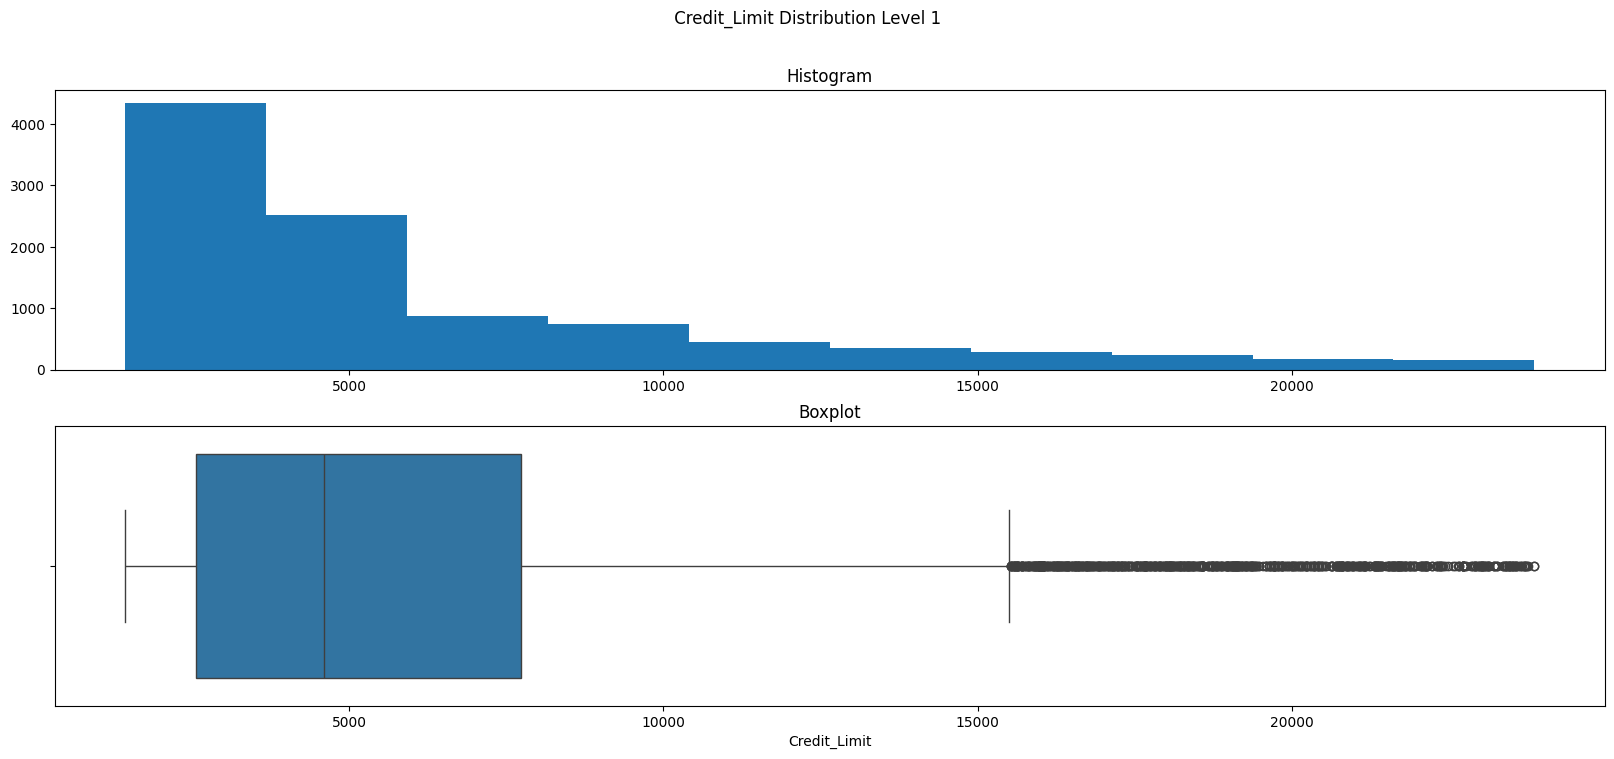

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(20,8))
ax[0].set_title('Histogram')
ax[0].hist(x=df['Credit_Limit'])
ax[1].set_title('Boxplot')
sns.boxplot(data=df,x='Credit_Limit',ax=ax[1])
plt.suptitle(' Credit_Limit Distribution Level 1')
plt.show()